In [4]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [14]:
path = 'HOSVD_denoise_patch/figure'

# Lena experiment

In [20]:
lena_data = [
    ['Lena.png', 'Lena_10.png', 'lena_10', 5, 10],
    ['Lena.png', 'Lena_80.png', 'lena_80', 10, 80]
]

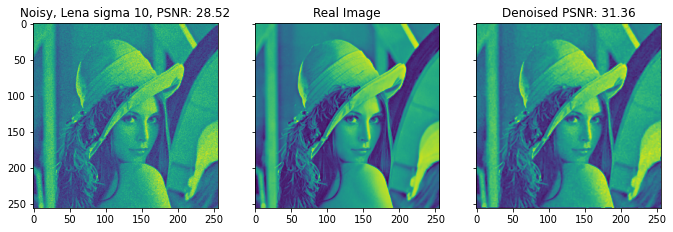

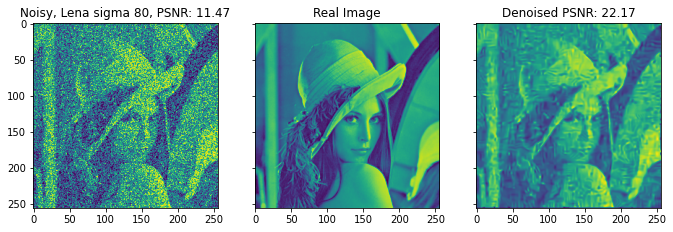

In [21]:
for row in lena_data:
    orig = cv2.imread(f'{path}/{row[0]}', 
                      cv2.IMREAD_GRAYSCALE)
    noise = cv2.imread(f'{path}/{row[1]}', 
                       cv2.IMREAD_GRAYSCALE)
    
    noise_psnr = psnr(orig, noise)
    best_psnr = 0
    best_picture = None
    
    for i in range(row[3]):
        denoised = cv2.imread(f'{path}/{row[2]}_{i+1}_it.png', 
                              cv2.IMREAD_GRAYSCALE)
        if psnr(orig, denoised) > best_psnr:
            best_psnr = psnr(orig, denoised)
            best_picture = denoised
            
    f, axs = plt.subplots(1, 3, sharey=True, figsize=(11.25, 7.5))
    axs[0].imshow(noise)
    axs[0].set_title(f'Noisy, Lena sigma {row[4]}, PSNR: {noise_psnr:.2f}')
    axs[1].imshow(orig)
    axs[1].set_title('Real Image')
    axs[2].imshow(best_picture)
    axs[2].set_title(f'Denoised PSNR: {best_psnr:.2f}')
    

# Real images experiment
## Reshaping and transforming to grey scale

In [24]:
images = [
    ['Sony_4-5_125_3200_plant_13', 'pl13', 'Sony_plant13', 'Noisy, Sony', 5],
    ['Sony_4-5_125_3200_plant_10', 'pl10', 'Sony_plant10', 'Noisy, Sony1', 5],
    ['NikonD800_10_100_6400_planandsofa_2', 'pls', 'pls', 'Noisy, NikonD800', 5],
    ['Canon5D2_5_160_6400_circuit_11', 'cir', 'cir', 'Noisy, Canon5D2', 5],
    ['Canon5D2_5_160_6400_bicycle_8', 'bic', 'bic', 'Noisy, Canon5D2', 5]
]

In [23]:
for row in images:
    orig = cv2.imread(
        f'{path}/{row[0]}_mean.JPG',
        cv2.IMREAD_GRAYSCALE
    )
    orig = cv2.resize(orig, (256, 256)) 
    cv2.imwrite(f'{path}/orig_{row[1]}.png', orig)
    
    noise = cv2.imread(
        f'{path}/{row[0]}_real.JPG',
        cv2.IMREAD_GRAYSCALE
    )
    noise = cv2.resize(noise, (256, 256)) 
    cv2.imwrite(f'{path}/noise_{row[1]}.png', noise)

## Evaluating the hosvd results

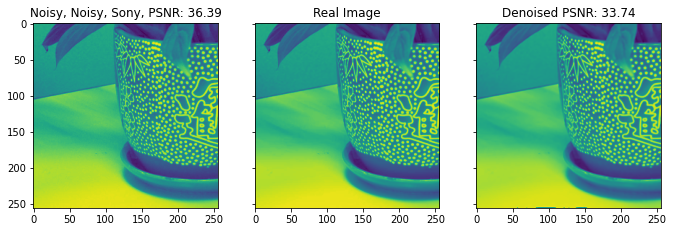

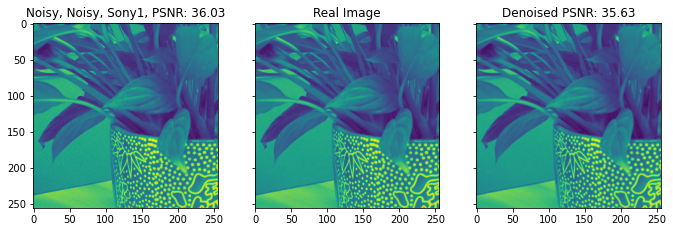

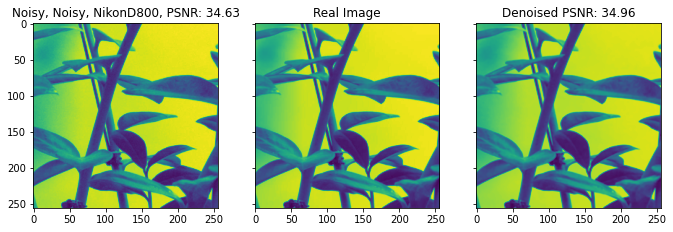

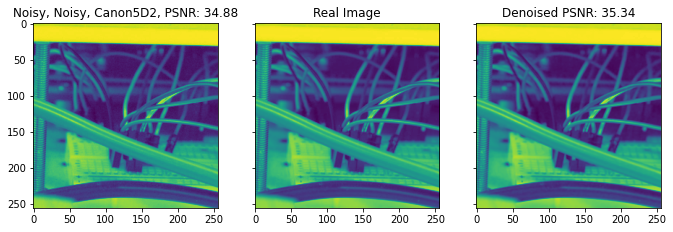

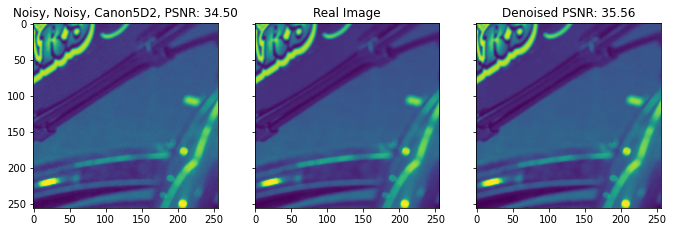

In [25]:
for row in images:
    orig = cv2.imread(
        f'{path}/orig_{row[1]}.png',
        cv2.IMREAD_GRAYSCALE
    )
    
    noise = cv2.imread(
        f'{path}/noise_{row[1]}.png',
        cv2.IMREAD_GRAYSCALE
    )
    
    noise_psnr = psnr(orig, noise)
    best_psnr = 0
    best_picture = None
    
    for i in range(row[4]):
        denoised = cv2.imread(f'{path}/{row[2]}_{i+1}_it.png', 
                              cv2.IMREAD_GRAYSCALE)
        if psnr(orig, denoised) > best_psnr:
            best_psnr = psnr(orig, denoised)
            best_picture = denoised
            
    f, axs = plt.subplots(1, 3, sharey=True, figsize=(11.25, 7.5))
    axs[0].imshow(noise)
    axs[0].set_title(f'Noisy, {row[3]}, PSNR: {noise_psnr:.2f}')
    axs[1].imshow(orig)
    axs[1].set_title('Real Image')
    axs[2].imshow(best_picture)
    axs[2].set_title(f'Denoised PSNR: {best_psnr:.2f}')